# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE
wine = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/7c1f4bdc00136dc2e55c87fa6b8ba6e8af6d1a68/datasets/wine_quality_red/wine_quality_red.tsv.gz", sep="\t")
wine = wine.dropna()
wine.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
1045,6.9,0.44,0.00,1.4,0.070,32.0,38.0,0.99438,3.32,0.58,11.4,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
700,10.6,1.02,0.43,2.9,0.076,26.0,88.0,0.99840,3.08,0.57,10.1,6
809,7.6,0.48,0.31,2.8,0.070,4.0,15.0,0.99693,3.22,0.55,10.3,6
744,11.1,0.39,0.54,2.7,0.095,21.0,101.0,1.00010,3.13,0.51,9.5,5
56,10.2,0.42,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6,5
483,10.6,0.36,0.60,2.2,0.152,7.0,18.0,0.99860,3.04,1.06,9.4,5
1187,7.0,0.43,0.30,2.0,0.085,6.0,39.0,0.99346,3.33,0.46,11.9,6
1041,6.9,0.49,0.19,1.7,0.079,13.0,26.0,0.99547,3.38,0.64,9.8,6
718,8.4,0.56,0.04,2.0,0.082,10.0,22.0,0.99760,3.22,0.44,9.6,5


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [4]:
# YOUR CODE HERE
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')

YOUR ANSWERS HERE

All columns except the target contain floating-point measurements of wine chemistry. These values represent the chemical properties of 1,599 Portuguese red wines, and each measurement influences wine aroma, structure, or taste.
- Fixed Acidity: The non-volatile acids that remain in the wine after fermentation and do not evaporate readily. It is calculated by subtracting volatile acidity from the total acidity.
- Volatile Acidity: The concentration of volatile acids, which are easily released into the air, affecting the wine's aroma. High levels can make wine taste sour or like vinegar.
- Citric Acid: A natural acid that adds freshness and flavor; too much can make wine taste sharp.
- Residual Sugar: The amount of natural grape sugar left in the wine after fermentation, which contributes to its sweetness.
- Chloride: Amount of salt in the wine. Very high levels can affect taste negatively.
- Free Sulfur Dioxide: The unbound portion of sulfur dioxide that actively protects the wine from oxidation and microbial spoilage. 
- Total Sulfar Dioxide: The sum of all sulfur dioxide, both "free" and "bound," present in the wine. 
- Density: How dense the wine is. Heavier wines usually have more sugar or alcohol.
- pH: Measures how acidic or basic the wine is. Lower pH = more acidic.
- Sulphates: Chemical compounds, often added as a preservative, to prevent oxidation, preserve color, and prevent the growth of unwanted bacteria.
- Alcohol: Alcohol percentage of the wine.
- Target: The wine’s quality score (from 0–10), based on sensory tests.

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

In [9]:
# YOUR CODE HERE
# Basic Analysis of the Data
wine.shape

(1599, 12)

In [16]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
target                    int64
dtype: object

In [ ]:
# Basic Analysis of the Data
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Check for the number of duplicated rows, which could be legit or duplicates (repeated chemical profiles are possible)
wine.duplicated().sum()

np.int64(240)

In [ ]:
# Check for bad data (impossible data ranges based on researched ranges)
wine[(wine['pH'] < 0) | (wine['pH'] > 14)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target


In [ ]:
# Check for bad data (impossible data ranges based on researched ranges)
wine[wine['alcohol'] <= 0]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target


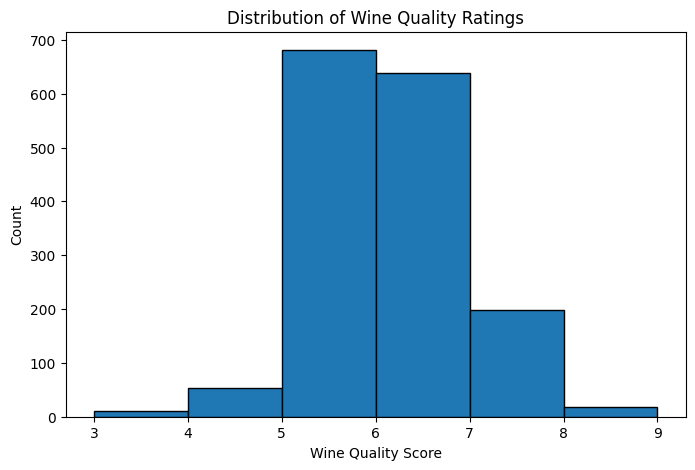

In [ ]:
# Looking at the distribution of the target/quality column
plt.figure(figsize=(8,5))
plt.hist(wine['target'], bins=range(3,10), edgecolor='black')
plt.xlabel("Wine Quality Score")
plt.ylabel("Count")
plt.title("Distribution of Wine Quality Ratings")
plt.show()

/tmp/ipykernel_2436/1144892265.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=qualities)


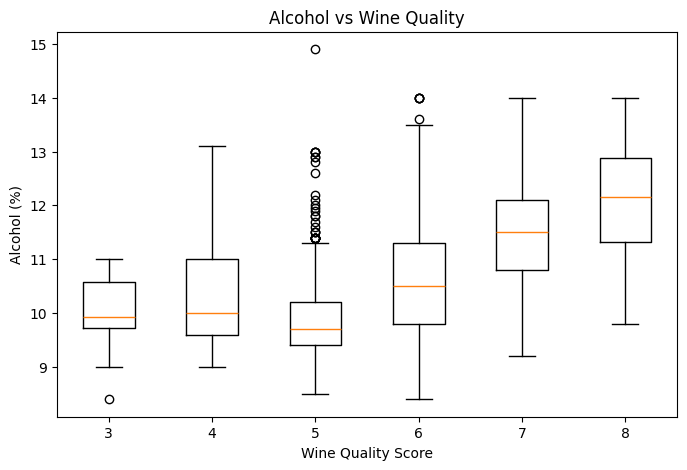

In [19]:
# Looking at how alcohol levels relate to target/quality score
qualities = sorted(wine['target'].unique())
data = [wine[wine['target']==q]['alcohol'] for q in qualities]

plt.figure(figsize=(8,5))
plt.boxplot(data, labels=qualities)
plt.xlabel("Wine Quality Score")
plt.ylabel("Alcohol (%)")
plt.title("Alcohol vs Wine Quality")
plt.show()

Exploring a personal interest: Natural Wines (low sulfite levels) and their quality levels:

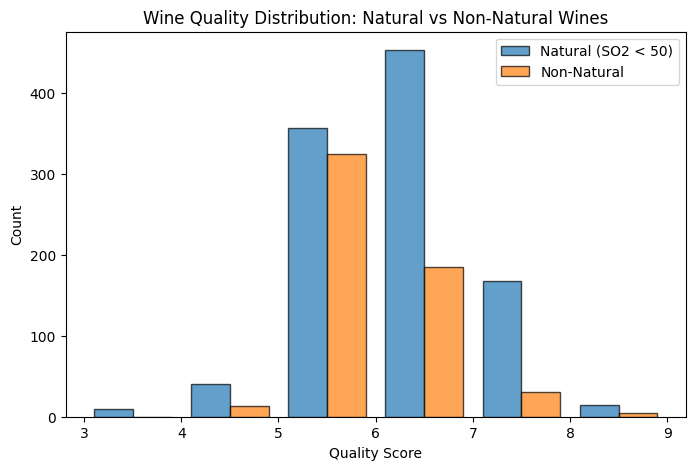

In [ ]:
# Exploring a personal interest: Natural Wines (low sulfite levels) and their quality levels
wine['is_natural'] = wine['total sulfur dioxide'] < 50

natural = wine[wine['is_natural']]
non_natural = wine[~wine['is_natural']]

plt.figure(figsize=(8,5))
plt.hist([natural['target'], non_natural['target']], 
         bins=range(3,10), 
         label=['Natural (SO2 < 50)', 'Non-Natural'], 
         edgecolor='black',
         alpha=0.7)

plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.title("Wine Quality Distribution: Natural vs Non-Natural Wines")
plt.legend()
plt.show()

/tmp/ipykernel_2436/3071792828.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([natural['total sulfur dioxide'], non_natural['total sulfur dioxide']],


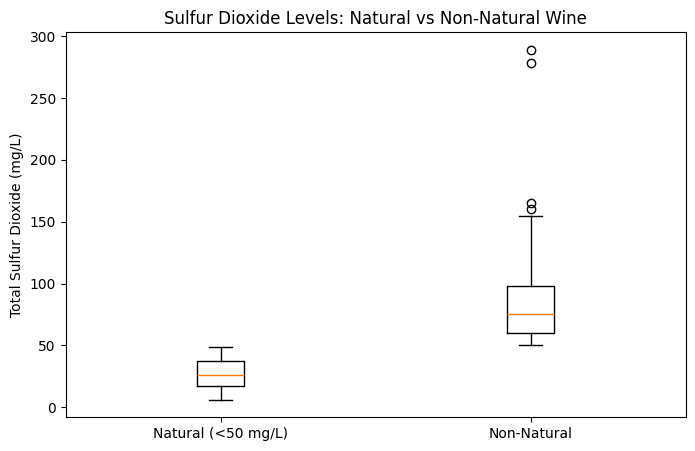

In [ ]:
# examining sulfite levels in natural vs non-natural wines (natural wines will be below 50 per the flag)
plt.figure(figsize=(8,5))
plt.boxplot([natural['total sulfur dioxide'], non_natural['total sulfur dioxide']],
            labels=['Natural (<50 mg/L)', 'Non-Natural'])
plt.ylabel("Total Sulfur Dioxide (mg/L)")
plt.title("Sulfur Dioxide Levels: Natural vs Non-Natural Wine")
plt.show()

/tmp/ipykernel_2436/1599758484.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([natural['alcohol'], non_natural['alcohol']],


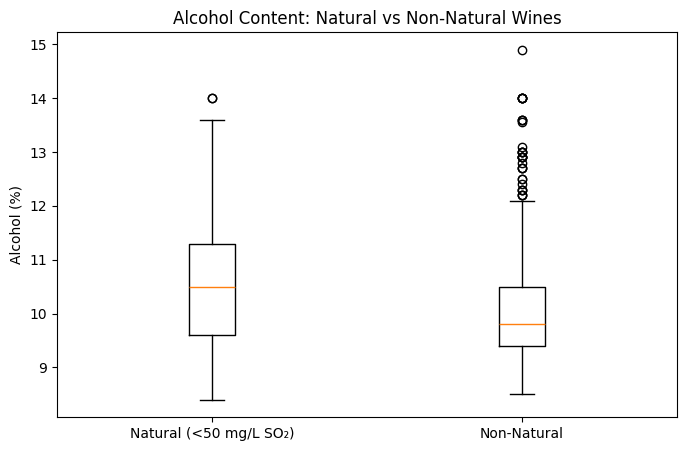

In [ ]:
# examining natural wine vs non-natural wine alcohol content
plt.figure(figsize=(8,5))
plt.boxplot([natural['alcohol'], non_natural['alcohol']],
            labels=['Natural (<50 mg/L SO₂)', 'Non-Natural'])
plt.ylabel("Alcohol (%)")
plt.title("Alcohol Content: Natural vs Non-Natural Wines")
plt.show()

/tmp/ipykernel_2436/3679058708.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


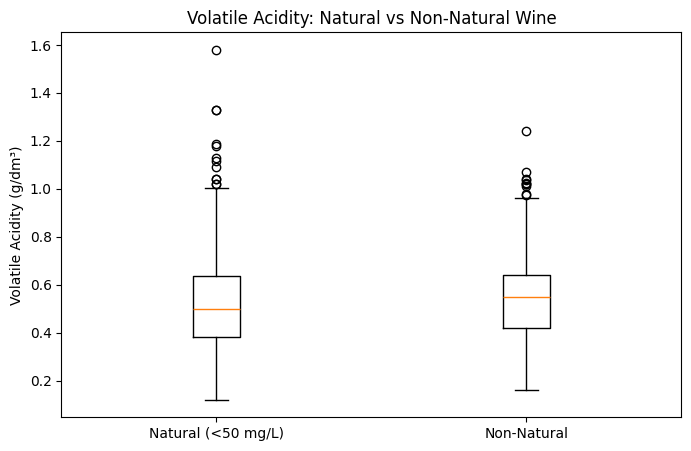

In [28]:
# another analysis of natural wines and their volatile acidity
plt.figure(figsize=(8,5))

plt.boxplot(
    [natural['volatile acidity'], non_natural['volatile acidity']],
    labels=['Natural (<50 mg/L)', 'Non-Natural']
)

plt.ylabel("Volatile Acidity (g/dm³)")
plt.title("Volatile Acidity: Natural vs Non-Natural Wine")
plt.show()

/tmp/ipykernel_2436/681455197.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


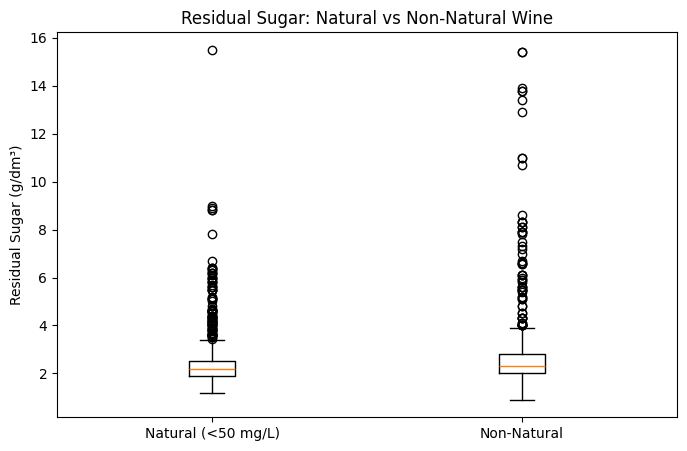

In [29]:
# another analysis of natural wines and their sugar levels
plt.figure(figsize=(8,5))

plt.boxplot(
    [natural['residual sugar'], non_natural['residual sugar']],
    labels=['Natural (<50 mg/L)', 'Non-Natural']
)

plt.ylabel("Residual Sugar (g/dm³)")
plt.title("Residual Sugar: Natural vs Non-Natural Wine")
plt.show()

YOUR ANSWERS HERE

Interesting chart #1:

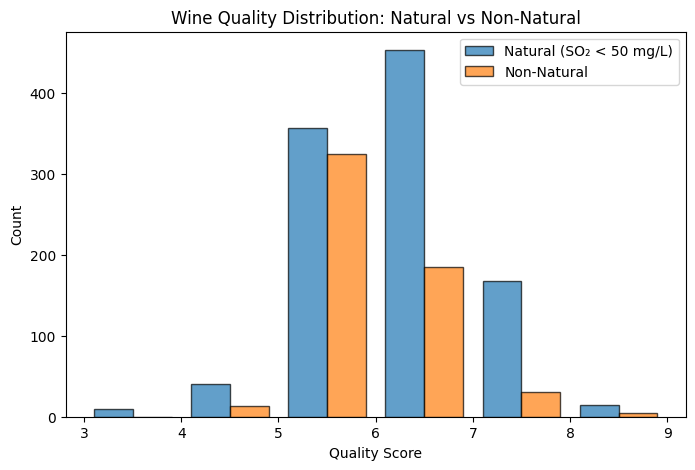

In [30]:
plt.figure(figsize=(8,5))

plt.hist(
    [natural['target'], non_natural['target']],
    bins=range(3, 10),
    label=['Natural (SO₂ < 50 mg/L)', 'Non-Natural'],
    edgecolor='black',
    alpha=0.7
)

plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.title("Wine Quality Distribution: Natural vs Non-Natural")
plt.legend()
plt.show()

Natural wines (defined as total SO₂ < 50 mg/L) represent the majority of samples in the dataset, and their quality scores cluster tightly around 5 and 6. Non-natural wines show a similar overall pattern but with slightly more representation at higher scores such as 7. However, because non-natural wines make up a much smaller portion of the dataset, their distribution is more uneven and sparse.

Overall, the two groups have similar quality profiles, but natural wines appear more tightly concentrated and show fewer extreme scores (both high and low), likely reflecting the limited number of samples rather than a strong quality difference.

Interesting chart #2:

/tmp/ipykernel_2436/1061393488.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([natural['alcohol'], non_natural['alcohol']],


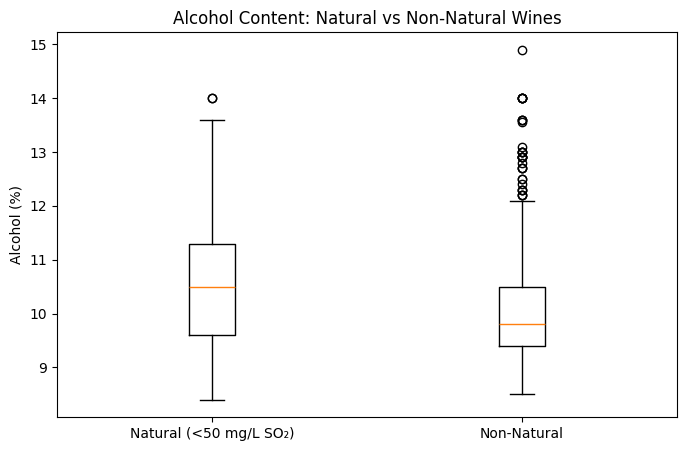

In [31]:
plt.figure(figsize=(8,5))
plt.boxplot([natural['alcohol'], non_natural['alcohol']],
            labels=['Natural (<50 mg/L SO₂)', 'Non-Natural'])
plt.ylabel("Alcohol (%)")
plt.title("Alcohol Content: Natural vs Non-Natural Wines")
plt.show()

The alcohol content of natural wines (SO₂ < 50 mg/L) is slightly higher on average than that of non-natural wines. Natural wines have a median alcohol level just above 10%, while non-natural wines cluster closer to 9.7%.

Natural wines also show a tighter distribution, with most samples falling between roughly 10% and 11%. In contrast, non-natural wines display greater variability, including several high-alcohol outliers reaching 12–15%. This suggests that natural wines in this dataset tend to have a more consistent alcohol profile, while the smaller set of non-natural wines includes a mix of lower- and higher-strength samples.

Interesting chart #3:

/tmp/ipykernel_2436/3581333917.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


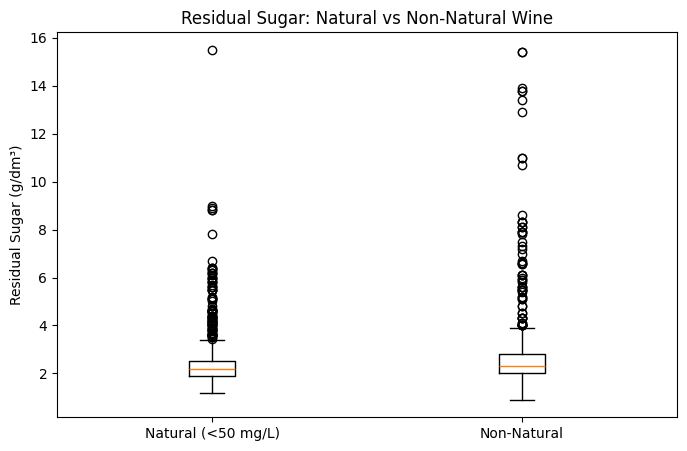

In [32]:
plt.figure(figsize=(8,5))

plt.boxplot(
    [natural['residual sugar'], non_natural['residual sugar']],
    labels=['Natural (<50 mg/L)', 'Non-Natural']
)

plt.ylabel("Residual Sugar (g/dm³)")
plt.title("Residual Sugar: Natural vs Non-Natural Wine")
plt.show()

The residual sugar profiles of natural and non-natural wines are very similar. Natural wines show a median residual sugar level a little above 2 g/dm³, while non-natural wines have a slightly higher median closer to 2.3 g/dm³. Both groups contain many outliers, including some wines with extremely high sugar levels above 10 g/dm³, but the bulk of the data for both falls between 1.8 and 2.7 g/dm³.

Because the distributions overlap almost completely, this chart suggests that residual sugar does not meaningfully distinguish natural wines from conventional wines in this dataset. Sweetness levels appear to be independent of sulfur dioxide usage.

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

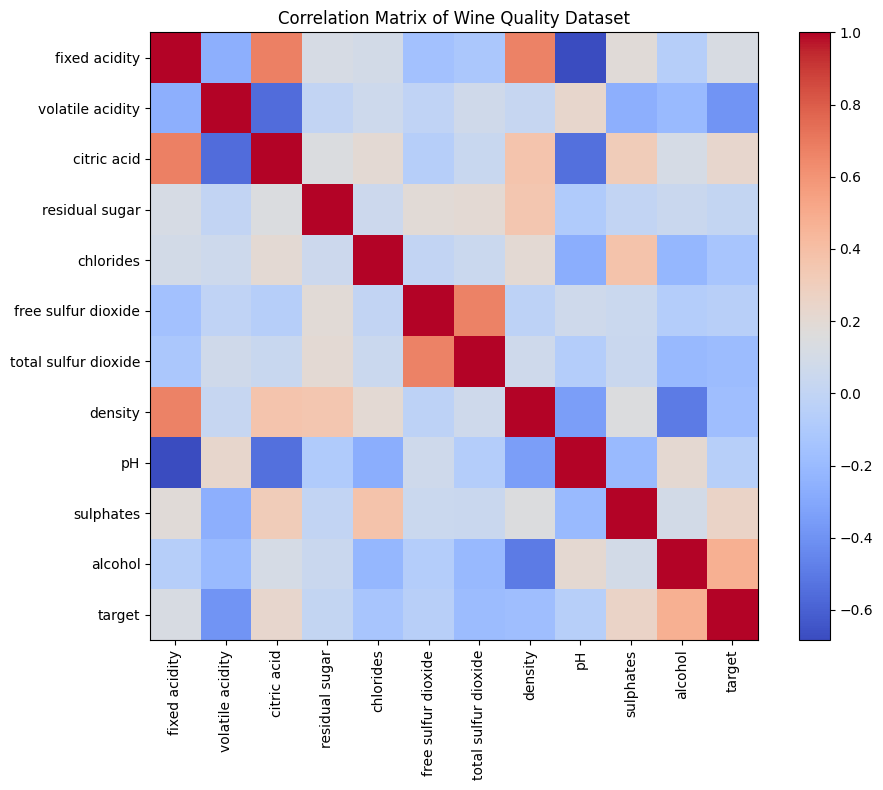

In [35]:
# YOUR CODE HERE (removing personal natural wine flag)
wine = wine.drop(columns=['is_natural'])
corr = wine.corr()

plt.figure(figsize=(10,8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Matrix of Wine Quality Dataset")
plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

The strongest correlation between two different columns is free sulfur dioxide and total sulfur dioxide. These variables are closely related chemically because total SO₂ includes the free SO₂ component, so they naturally rise together.

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

YOUR ANSWERS HERE

1) LinearRegression (ordinary least squares)
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- https://en.wikipedia.org/wiki/Linear_regression

2) RandomForestRegressor (tree ensemble)
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- https://en.wikipedia.org/wiki/Random_forest

3) KNeighborsRegressor (k-nearest neighbors regression)
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
- https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [4]:
# YOUR CODE HERE

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

X = wine.drop(columns=['target'])
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# 1. Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

# 2. Random Forest
model_rf = RandomForestRegressor(
    n_estimators=200, 
    max_depth=6,
    random_state=42
)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

# 3. KNN Regressor
model_knn = KNeighborsRegressor(n_neighbors=7)
model_knn.fit(X_train, y_train)
pred_knn = model_knn.predict(X_test)

results = {
    "Linear Regression": {
        "L1": mean_absolute_error(y_test, pred_lr),
        "L2": mean_squared_error(y_test, pred_lr)
    },
    "Random Forest": {
        "L1": mean_absolute_error(y_test, pred_rf),
        "L2": mean_squared_error(y_test, pred_rf)
    },
    "KNN": {
        "L1": mean_absolute_error(y_test, pred_knn),
        "L2": mean_squared_error(y_test, pred_knn)
    },
}

for name, vals in results.items():
    print(f"{name}: L1 = {vals['L1']:.2f}, L2 = {vals['L2']:.2f}")


Linear Regression: L1 = 0.50, L2 = 0.39
Random Forest: L1 = 0.48, L2 = 0.36
KNN: L1 = 0.58, L2 = 0.53


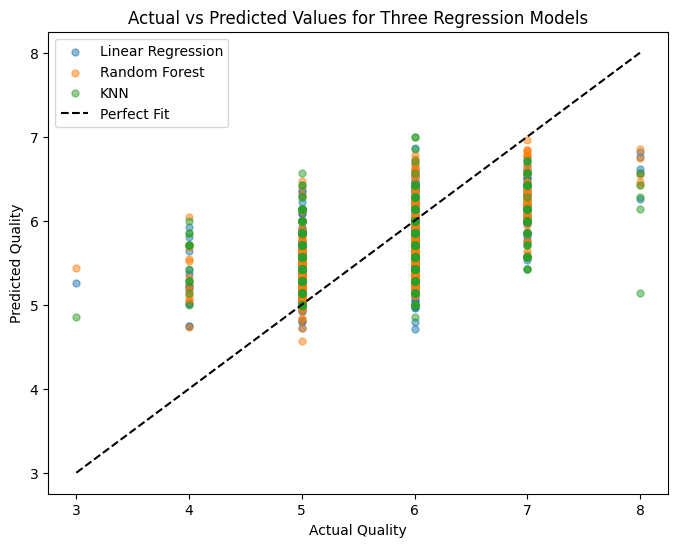

In [5]:
plt.figure(figsize=(8,6))

plt.scatter(y_test, pred_lr, alpha=0.5, label="Linear Regression", s=25)
plt.scatter(y_test, pred_rf, alpha=0.5, label="Random Forest", s=25)
plt.scatter(y_test, pred_knn, alpha=0.5, label="KNN", s=25)

# reference perfect prediction line
min_val = min(y_test.min(), pred_lr.min(), pred_rf.min(), pred_knn.min())
max_val = max(y_test.max(), pred_lr.max(), pred_rf.max(), pred_knn.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label="Perfect Fit")

plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Values for Three Regression Models")
plt.legend()
plt.show()

YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [6]:
# YOUR CODE HERE
from sklearn.model_selection import KFold, cross_val_score

whole_L2 = {
    "Linear Regression": mean_squared_error(y_test, pred_lr),
    "Random Forest": mean_squared_error(y_test, pred_rf),
    "KNN": mean_squared_error(y_test, pred_knn)
}


kf = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=200, max_depth=6, random_state=42
    ),
    "KNN": KNeighborsRegressor(n_neighbors=7)
}

cv_L2 = {}

for name, model in models.items():
    scores = cross_val_score(
        model, X, y,
        cv=kf,
        scoring="neg_mean_squared_error"
    )
    cv_L2[name] = -scores.mean()


print("L2 Loss Comparison: Whole-Data vs 5-Fold CV\n")

for name in models:
    print(f"{name}:")
    print(f"  Whole-data L2: {whole_L2[name]:.2f}")
    print(f"  5-fold CV L2: {cv_L2[name]:.2f}\n")

L2 Loss Comparison: Whole-Data vs 5-Fold CV

Linear Regression:
  Whole-data L2: 0.39
  5-fold CV L2: 0.43

Random Forest:
  Whole-data L2: 0.36
  5-fold CV L2: 0.38

KNN:
  Whole-data L2: 0.53
  5-fold CV L2: 0.56



YOUR ANSWERS HERE

Cross-validation L2 losses were slightly higher than whole-data L2 losses for all three models, confirming mild overfitting. Random Forest generalized the best with the lowest CV error, Linear Regression showed moderate performance, and KNN performed worst with the highest error and weakest generalization.

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [7]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

pipe_rf = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestRegressor(
        n_estimators=200,
        max_depth=6,
        random_state=42
    ))
])

pipe_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=7))
])

pipelines = {
    "Linear Regression (scaled)": pipe_lr,
    "Random Forest (scaled)": pipe_rf,
    "KNN (scaled)": pipe_knn
}

scaled_results = {}

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    L2 = mean_squared_error(y_test, y_pred)
    scaled_results[name] = L2
    print(f"{name}: L2 = {L2:.2f}")

Linear Regression (scaled): L2 = 0.39
Random Forest (scaled): L2 = 0.36
KNN (scaled): L2 = 0.42


YOUR ANSWERS HERE

Linear Regression and Random Forest produced almost identical L2 losses to the unscaled models (0.39 and 0.36 respectively), indicating that these models are not sensitive to feature scaling. The KNN model improved substantially, with its L2 loss dropping from 0.53 to 0.42. This happened because KNN relies on distance calculations, and standardization ensures all features contribute equally.

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

YOUR ANSWERS HERE

Trying a thousand random decision trees probably won’t beat standard ensemble methods and would mostly just burn time and computation, even with cross-validation.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

Out of the three models I built in this project (Linear Regression, KNN, and Random Forest), the Random Forest Regressor is the best-performing model overall. I chose the best model based on L2 loss (mean squared error), since L2 penalizes larger mistakes more heavily, which is important for predicting wine quality where errors of even 1–2 points are meaningful. Using this criterion, Random Forest consistently produced the lowest L2 losses across every evaluation setup.

Random Forest not only achieved the lowest errors, but it also had the smallest gap between whole-data and cross-validated L2, which indicates stronger generalization and less overfitting than the other models.

This performance difference makes sense in the context of the wine chemistry data: wine quality is influenced by nonlinear interactions (e.g., alcohol × acidity effects), and Random Forest naturally models these patterns. Linear Regression assumes straight-line relationships and therefore misses important structure in the data, while KNN struggles because chemically similar wines can still receive different human tasting scores.

For these reasons, Random Forest is the best model as it consistently achieved the lowest prediction error and best reflects the complex, nonlinear relationships present in the wine dataset.